# Exploratory Factor Analysis and K-Means Clustering on Diabetes Patient Survey Data
This is a sample of Python code to run Explorator Factor Analysis and K-Means Clustering on actual Diabetes patient survey responses.  The analysis provides the step by step for running the algorithms and visualizing the output. 

In [157]:
import pandas as pd
import numpy as np
import os 
from pandas import DataFrame


## Import from Excel
Here I am importing the raw data file from Excel.  Data was downloaded from QuestionPro in .xlsx format.  I cleared the data with missing values, leaving 434 responses to the survey items (n = 434).  There were 25 questions in the survey, most were Likert scale response questions that the respondent had to answer.  Each question was measured using a 7-point agreement scale, where 1 = "strongly disagree" and 7 = " strongly agree".  A few of the other questions were binary (yes / no) or categorical in nature.

In [14]:
excel_file = pd.read_excel(r'diabetes_data.xlsx')
df = pd.DataFrame(excel_file)
df = df.dropna(how = "any") 
df.count()


A    434
B    434
C    434
D    434
E    434
F    434
G    434
H    434
I    434
J    434
K    434
L    434
M    434
N    434
O    434
P    434
Q    434
R    434
S    434
T    434
U    434
V    434
W    434
X    434
Y    434
dtype: int64

In [11]:
df.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
56502335,6,6,6,1,3.0,2,1,1,1,1,...,5.0,2.0,6.0,7.0,6.0,6.0,2.0,6.0,7.0,6.0
56502044,7,7,7,3,0.0,1,1,1,1,1,...,7.0,7.0,7.0,7.0,7.0,7.0,1.0,7.0,7.0,7.0
56521758,3,6,5,2,3.0,2,1,1,2,1,...,6.0,5.0,6.0,6.0,6.0,6.0,1.0,3.0,6.0,6.0
56514146,7,7,6,3,1.0,1,1,1,2,1,...,6.0,6.0,6.0,7.0,7.0,7.0,1.0,6.0,7.0,6.0
56518387,7,7,7,3,0.0,1,1,1,4,1,...,7.0,7.0,7.0,7.0,7.0,7.0,1.0,7.0,7.0,7.0


## Factor Analysis
in order to reduce the dimensionality of the data, I used Exploratroy Factor Analysis using the factor analyzer module in Python.  This produced a result that most closely matched that from SPSS.  In determining the correct number of factors to extract, it is best to examine the Eigenvalues for each extracted factor.  Eigenvalues tell you the amount of variance explained by each factor.  Factors with an EV > 1 should be retained.  

these are the Eigenvalues produced by the Factor Analysis procedure: 

    Common_Factor_Eigenvalues
0                    5.333385
1                    1.973328
2                    1.453436
3                    1.314101
4                    0.488146
5                    0.370327
6                    0.217004
7                    0.204804
8                    0.151623
9                    0.113361
10                   0.090478
11                   0.050834
12                   0.021145
13                   0.007463
14                  -0.014694
15                  -0.045699
16                  -0.092415
17                  -0.122068
18                  -0.133415
19                  -0.151651
20                  -0.153599
21                  -0.191482
22                  -0.250575
23                  -0.279836
24                  -0.313051


this is a plot showing the Eigenvalues. 



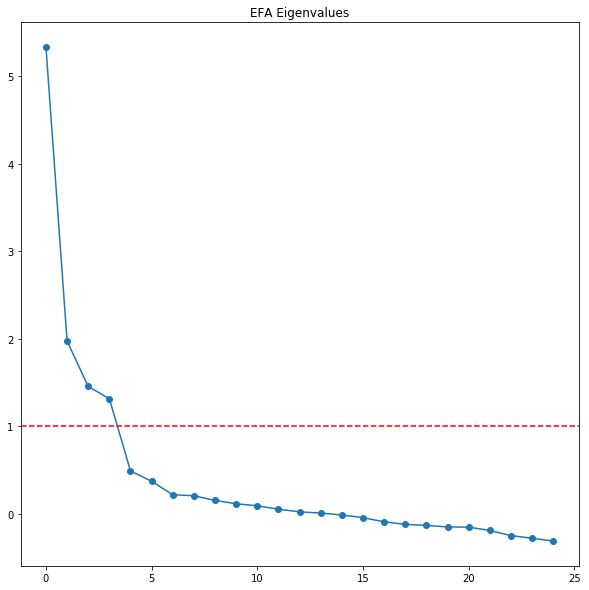




 The table below shows the factor loadings.  These can be read as essentially correlationsbetween each variable and its factor.  Here we have suppressed low factor loadings (below absolute value of .3) 

    Factor1   Factor2   Factor3   Factor4
A  0.781048                              
B   0.70955                              
C  0.589779                              
D  0.305919                              
E                                        
F                                0.539615
G                                0.649173
H                                0.668029
I                                0.470189
J                                0.426596
K                                        
L                      0.605093          
M                      0.741453          
N                      0.538103          
O                      0.696321          
P             0.82648                    
Q             0.42858                    
R            0.843011                

In [169]:
#Factor Analysis using factor_analyzer

import pandas as pd
from factor_analyzer import FactorAnalyzer
df_features = df
fa = FactorAnalyzer()
fa.analyze(df_features, 4, rotation='varimax', method='ml',bounds = (.3,1))

#produce Eigenvalues
ev, v = fa.get_eigenvalues()
print("these are the Eigenvalues produced by the Factor Analysis procedure: \n")
print(v)
fig = plt.figure(figsize=(10, 10))
plt.plot(v,marker='o')
plt.title('EFA Eigenvalues')
plt.axhline(y=1, ls="--", c='red')
print("\n\nthis is a plot showing the Eigenvalues. \n")
plt.show()
type(v)


#print the factor loadings for each factor
print("\n\n\n The table below shows the factor loadings.  These can be read as essentially correlations\
between each variable and its factor.  Here we have suppressed low factor loadings (below absolute value of .3) \n")
FL = fa.loadings
FL =FL[FL > abs(.3)].fillna('')
print(FL)

In [146]:
FS = fa.get_scores(df_features)
fa.get_scores(df_features).head()


,Factor1,Factor2,Factor3,Factor4
0,-0.054953,-0.284472,-1.328741,-0.131137
1,1.092655,0.848037,-0.667054,-0.393525
2,-2.004259,0.517942,-0.218829,-0.433025
3,0.889358,0.247111,-0.072290,-0.183916
4,1.151305,0.885104,-0.502512,0.294696


In [147]:
# K-Means Cluster Analysis 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3)
kmeans.fit(FS)

# Learn the labels
labels = kmeans.predict(FS)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.24295709 -1.43064796 -0.12436277  0.01092374]
 [ 0.38138944  0.41556157 -0.62424693 -0.05311073]
 [-0.30932402  0.2929933   0.78838192  0.05545484]]


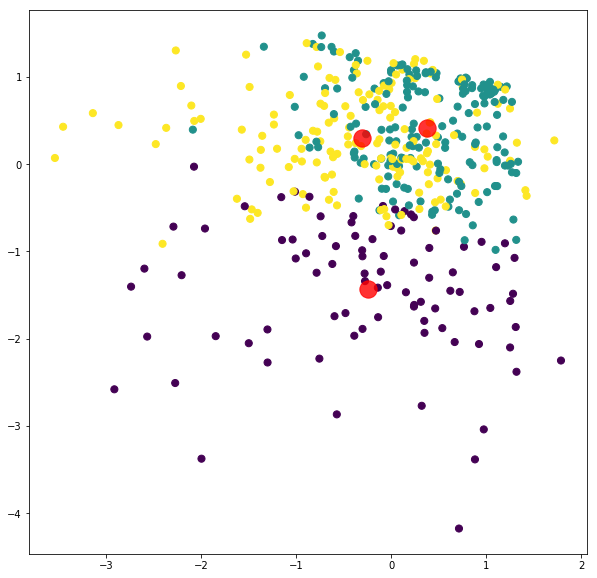

In [156]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(FS['Factor1'], FS['Factor2'], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=.8);


In [82]:
print(labels)

[2 2 1 2 2 2 2 2 2 0 2 0 1 2 0 0 2 1 2 1 1 2 2 2 0 2 2 1 1 2 2 0 2 2 0 2 2
 0 0 1 0 0 1 1 1 2 0 2 2 2 0 0 2 2 0 2 2 0 0 2 1 1 2 2 0 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 0 2 2 2 2 1 2 0 0 0 2 2 2
 2 1 1 2 2 2 2 1 1 2 1 1 1 2 0 1 1 2 2 2 0 2 2 2 2 2 0 2 2 1 2 1 0 0 0 2 2
 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 1 2 1 2 2 2 1 2 0 2 1 2 1 2 1 2 0 0
 2 2 2 1 1 1 0 2 2 2 2 1 2 2 2 0 2 2 0 0 2 2 2 2 2 2 0 0 2 1 1 0 2 2 1 1 2
 0 0 2 0 2 2 0 2 2 2 0 1 2 0 2 2 2 1 2 1 2 2 0 2 0 2 1 0 1 0 2 2 2 1 2 2 2
 0 2 2 2 2 2 0 0 1 0 2 0 2 0 0 2 0 0 1 2 2 2 0 1 2 0 0 2 2 2 2 1 1 1 0 1 2
 2 2 1 0 0 0 2 2 1 2 2 2 2 2 1 1 2 1 1 2 0 1 2 0 1 2 1 1 0 2 2 1 2 0 1 2 1
 2 0 2 0 2 0 2 2 0 1 2 1 2 2 2 0 2 2 2 2 2 2 1 2 1 2 1 1 2 1 2 2 2 2 0 0 2
 2 2 2 0 2 2 1 0 2 1 1 1 2 2 2 2 2 2 1 1 1 0 0 2 2 0 2 2 1 2 2 1 0 2 0 1 0
 2 2 2 0 0 2 2 2 2 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2]
